In [1]:
import pandas as pd

# Load the full dataset
try:
    df = pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Make sure the file is in the correct directory.")
    exit()

# Display the first few rows
print(df.head())

# Get some basic info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())

# Check the distribution of the target variable 'Class'
print(df['Class'].value_counts(normalize=True))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the Time and Amount columns
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Display the first few rows after scaling
print(df.head())
print(df.describe())


       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [3]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Check the class distribution in the resampled dataset
print(df_resampled['Class'].value_counts(normalize=True))

# Display the first few rows of the resampled DataFrame
print(df_resampled.head())


Class
0    0.5
1    0.5
Name: proportion, dtype: float64
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable from the resampled DataFrame
X = df_resampled.drop('Class', axis=1)
y = df_resampled['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

# Fit the model to the training data
iso_forest.fit(X_train)

# Predict anomalies on the test set
y_pred = iso_forest.predict(X_test)

# Convert predictions to binary: 1 for normal, 0 for anomaly
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))


Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.00      0.00     56750
           1       0.50      1.00      0.67     56976

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.26      0.50      0.33    113726

Confusion Matrix:
 [[    1 56749]
 [  107 56869]]


In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable from the resampled DataFrame
X = df_resampled.drop('Class', axis=1)
y = df_resampled['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)

# Fit the model to the training data
iso_forest.fit(X_train)

# Predict anomalies on the test set
y_pred = iso_forest.predict(X_test)

# Convert predictions to binary: 1 for normal, 0 for anomaly
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))


Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25     56750
           1       0.25      0.25      0.25     56976

    accuracy                           0.25    113726
   macro avg       0.25      0.25      0.25    113726
weighted avg       0.25      0.25      0.25    113726

Confusion Matrix:
 [[14399 42351]
 [42649 14327]]


In [6]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable from the resampled DataFrame
X = df_resampled.drop('Class', axis=1)
y = df_resampled['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)

# Fit the model to the training data and predict anomalies on the training data
y_pred_train = lof.fit_predict(X_train)

# Predict anomalies on the test set
y_pred_test = lof.fit_predict(X_test)

# Convert predictions to binary: 1 for normal, 0 for anomaly
y_pred_binary = [1 if x == 1 else 0 for x in y_pred_test]

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     56750
           1       0.50      1.00      0.67     56976

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726

Confusion Matrix:
 [[    0 56750]
 [  114 56862]]


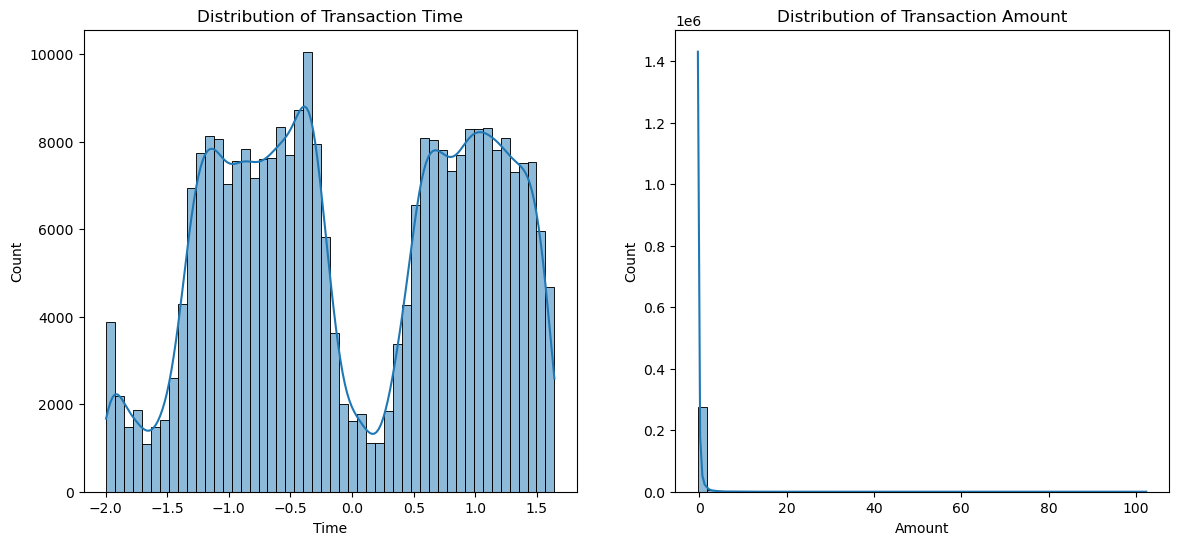

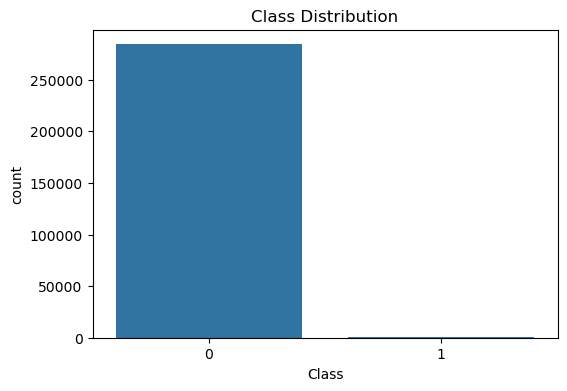

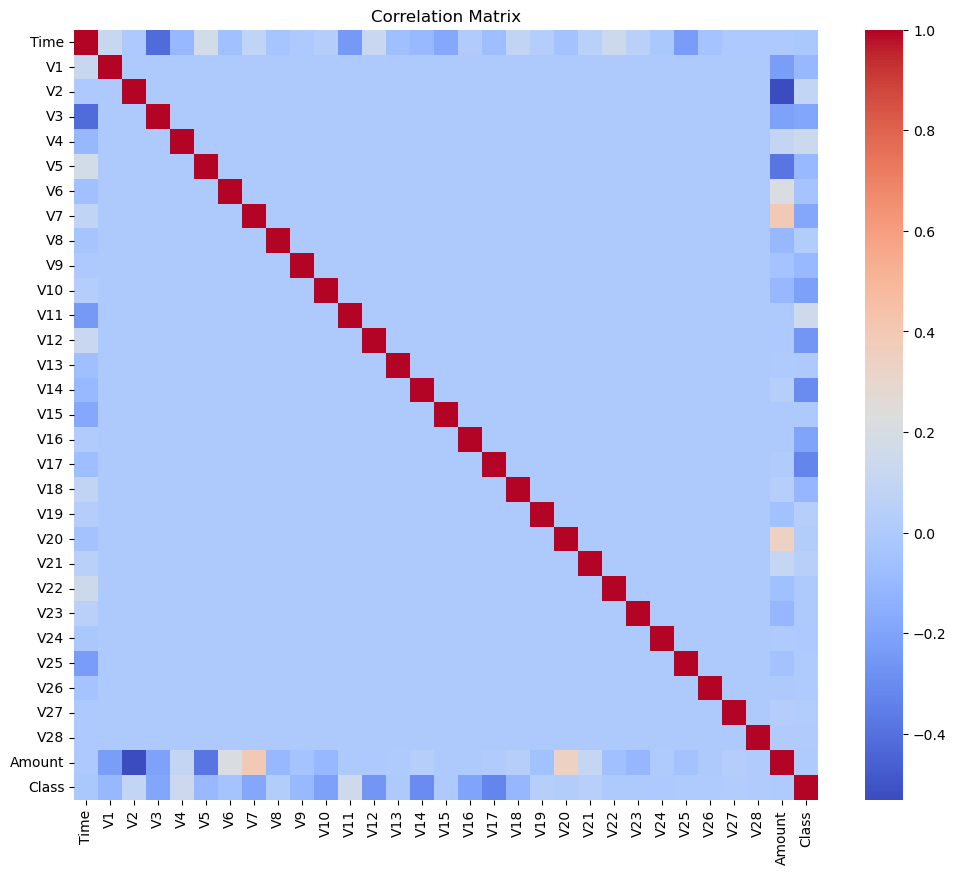

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Time and Amount
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')

plt.show()

# 2. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# 3. Correlation Matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title('Correlation Matrix')
plt.show()


In [8]:
import pandas as pd


# Calculate the IQR for the 'Amount' column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Remove outliers from the DataFrame
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Print the number of outliers removed
print("Number of outliers removed:", len(outliers))

# Display the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)

# Display descriptive statistics for the 'Amount' column after removing outliers
print("Descriptive statistics for Amount after removing outliers:\n", df_no_outliers['Amount'].describe())


Number of outliers removed: 31904
Shape of DataFrame after removing outliers: (252903, 31)
Descriptive statistics for Amount after removing outliers:
 count    252903.000000
mean         -0.213397
std           0.168608
min          -0.353229
25%          -0.335278
50%          -0.289260
75%          -0.153365
max           0.384418
Name: Amount, dtype: float64


In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Calculate the IQR for the 'Amount' column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Separate features and target variable from the resampled DataFrame
X = df_no_outliers.drop('Class', axis=1)
y = df_no_outliers['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)

# Fit the model to the training data and predict anomalies on the training data
y_pred_train = lof.fit_predict(X_train)

# Predict anomalies on the test set
y_pred_test = lof.fit_predict(X_test)

# Convert predictions to binary: 1 for normal, 0 for anomaly
y_pred_binary = [1 if x == 1 else 0 for x in y_pred_test]

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.00      0.00     50490
           1       0.00      0.98      0.00        91

    accuracy                           0.00     50581
   macro avg       0.48      0.49      0.00     50581
weighted avg       0.96      0.00      0.00     50581

Confusion Matrix:
 [[   49 50441]
 [    2    89]]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Calculate the IQR for the 'Amount' column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Separate features and target variable from the resampled DataFrame
X = df_no_outliers.drop('Class', axis=1)
y = df_no_outliers['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict anomalies on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.95      0.76      0.84        91

    accuracy                           1.00     50581
   macro avg       0.97      0.88      0.92     50581
weighted avg       1.00      1.00      1.00     50581

Confusion Matrix:
 [[50486     4]
 [   22    69]]


In [11]:
import pickle

# Save the model to disk
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)
